### 复习高斯混合模型

In [1]:
import numpy as np
import copy
import math
import matplotlib.pyplot as plt

In [39]:
def init_data(Sigma1, Mu1, Mu2, k, N):
    """
    初始化数据
    """
    global X
    global Mu
    global Ex
    
    X = np.zeros((1, N))
    Mu = np.random.random(2)
    Ex = np.zeros((N, k))
    
    for i in range(0, N):
        if np.random.random(1) > 0.5:
            X[0, i] = np.random.normal()*Sigma1 + Mu1
        else:
            X[0, i] = np.random.normal()*Sigma1 + Mu2
    print(len(X))    
            
def e_step(Sigma, k, N):
    """
    计算期望
    """
    global Ex
    global Mu
    global X
    
    for i in range(0, N):#遍历数据点
        Denom = 0
        #计算总和
        for j in range(0, k):
            Denom += math.exp((-1/(2 * float(Sigma**2)))*(float(X[0, i]-Mu[j])**2))
        #计算部分
        for j in range(0, k):
            
            Numer = math.exp((-1/(2 * float(Sigma**2)))*(float(X[0, i]-Mu[j])**2))
            
            Ex[i, j] = Numer / Denom
            
def m_step(k, N):
    """
    计算期望最大化参数
    """
    global Ex
    global X
    
    for j in range(0, k):
        Numer = 0
        Denom = 0
        for i in range(0, N):
            Numer += Ex[i, j] * X[0, i]
            Denom += Ex[i, j]
        Mu[j] = Numer / Denom

def run(Sigma, Mu1, Mu2, k, N, inter_num, Epsilon):
    """
    迭代更新参数
    """
    init_data(Sigma, Mu1, Mu2, k, N)

    Ex1 = []
    Ex2 = []
    
    
    for i in range(inter_num):
        old_mu = copy.deepcopy(Mu)
        e_step(Sigma, k, N)
        m_step(k, N)
        print("迭代 :{}, 期望 : {}".format(i, Mu))
        if sum(abs(old_mu - Mu)<Epsilon):
            break
            
        Ex1.append(Mu[0])
        Ex2.append(Mu[1])
    return Ex1, Ex2, i

In [40]:
ex1, ex1, i= run(6, 40, 20, 2, 1000, 1000, 0.0001)


1
迭代 :0, 期望 : [29.94893687 30.25728548]
迭代 :1, 期望 : [29.49409219 30.72182595]
迭代 :2, 期望 : [27.71984903 32.49590307]
迭代 :3, 期望 : [22.91765536 37.28841028]
迭代 :4, 期望 : [19.96464446 40.27005141]
迭代 :5, 期望 : [19.7148747  40.55016792]
迭代 :6, 期望 : [19.70825468 40.56879444]
迭代 :7, 期望 : [19.70983706 40.5715577 ]
迭代 :8, 期望 : [19.71058255 40.57236937]
迭代 :9, 期望 : [19.71085744 40.57265177]
迭代 :10, 期望 : [19.71095617 40.57275245]


In [1]:
import math 
import copy 
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def init_data(Sigma, Mu1, Mu2, k, N):
    """初始化数据"""
    
    global X
    global Mu
    global Expections
    
    X = np.zeros((1, N))
    Mu = np.random.random(2)
    Expections = np.zeros((N, k))
    
    for i in range(0, N):
        if np.random.random(1) > 0.5:
            X[0, i] = np.random.normal()*Sigma + Mu1
        else:
            X[0, i] = np.random.normal()*Sigma + Mu2

            
def e_step(Sigma, k, N):
    """"""
    global X
    global Mu
    global Expections
    
    for i in range(0, N):
        Denom = 0
        for j in range(0, k):
            Denom += math.exp((-1/(2*float(Sigma**2)))*(float(X[0,i]- Mu[j])**2))
        for j in range(0, k):
            Numer = math.exp((-1/(2*float(Sigma**2))) *(float(X[0,i]- Mu[j])**2))
           
            Expections[i, j] = Numer/Denom
        
def m_step(k, N):

    global Expectations
    global X
    
    for j in range(k):
        Numer = 0
        Denom = 0
        
        for i in range(N):
            Numer += Expections[i, j] * X[0, i]
            Denom += Expections[i, j]
            
        Mu[j] = Numer/Denom
    
def run(Sigma, Mu1, Mu2, k, N, inter_num, Epsilon):
    """"""
    init_data(Sigma, Mu1, Mu2, k, N)
    Ex1 = []
    Ex2 = []
    for i in range(inter_num):
        Old_Mu = copy.deepcopy(Mu)
        e_step(Sigma, k, N)
        m_step(k,N)
        print("迭代 :{}, 期望 : {}".format(i, Mu))
        if sum(abs(Mu-Old_Mu)) < Epsilon:

            break

        Ex1.append(Mu[0])
        Ex2.append(Mu[1])
        
    return Ex1, Ex2, i     

迭代 :0, 期望 : [29.00292166 30.64019352]
迭代 :1, 期望 : [26.90429165 33.00291415]
迭代 :2, 期望 : [22.05957901 37.9458841 ]
迭代 :3, 期望 : [20.14850655 40.13214608]
迭代 :4, 期望 : [20.07030296 40.37837093]
迭代 :5, 期望 : [20.09589422 40.42468221]
迭代 :6, 期望 : [20.10934022 40.44072046]
迭代 :7, 期望 : [20.1149777  40.44710843]
迭代 :8, 期望 : [20.11728375 40.44970301]
迭代 :9, 期望 : [20.11822394 40.45075958]
迭代 :10, 期望 : [20.11860706 40.45119   ]
迭代 :11, 期望 : [20.11876315 40.45136536]
迭代 :12, 期望 : [20.11882675 40.4514368 ]
迭代 :13, 期望 : [20.11885266 40.45146591]


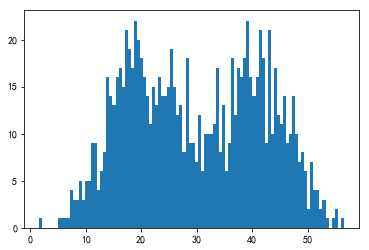

In [14]:

if __name__ == "__main__":
    Ex1, Ex2, iter_num = run(6, 40, 20, 2, 1000, 1000, 0.0001)
    X_num = np.arange(0, iter_num, 1)
    plt.hist(X[0, :], 100)
    # plt.plot(X[0,:])
    plt.savefig("高斯混合模型1")
    plt.show() 

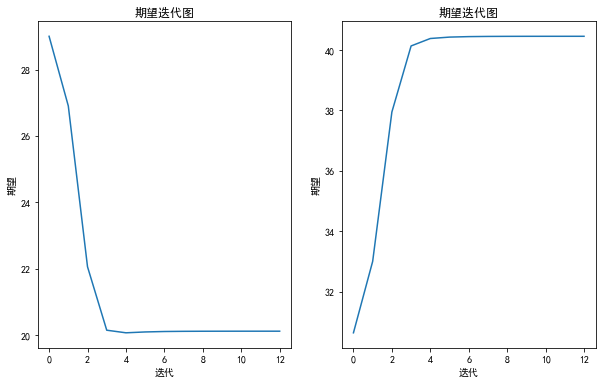

In [15]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.plot(X_num, Ex1)
plt.xlabel("迭代")
plt.ylabel("期望")
plt.title("期望迭代图")
plt.savefig("Ex1")

plt.subplot(122)
plt.plot(X_num, Ex2)
plt.xlabel("迭代")
plt.ylabel("期望")
plt.title("期望迭代图")
plt.savefig("Ex2");